# 曽呂利新左衛門問題

## 【問題1】100日目の米粒の数
100日目には合計で米粒をいくつもらっているのかを計算するコードを作成し、答えを出力してください。

In [26]:
"""
100日目には合計で米粒をいくつもらっているのかを計算するコードを作成
"""
#定数定義
RICE = 1
DAYS = 100

#１００日目に取得する米粒数を計算
n_day_get_rice = RICE *2**(DAYS-1)
print("100日目に取得する米粒は{}個です。".format(n_day_get_rice))

100日目に取得する米粒は633825300114114700748351602688個です。


また、1日目から100日目までの「その日にもらう米の数」と「その日までに累計で貰う米の数」の推移を折れ線グラフで表現してください。（縦軸が米の数、横軸が日数）

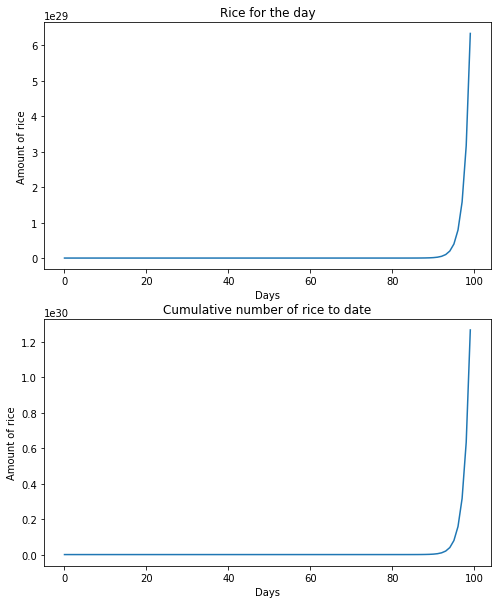

In [41]:
"""
1日目から100日目までの「その日にもらう米の数」と
「その日までに累計で貰う米の数」の推移を折れ線グラフで表現
"""

#リスト作成
n_day_rice = [RICE]  #「その日にもらう米の数」
ruikei = [RICE] #「その日までに累計で貰う米の数」

n_day_get_rice = RICE #その日にもらうお米の変数定義
for i in range(DAYS-1):
    n_day_get_rice *= 2
    n_day_rice.append(n_day_get_rice)
    ruikei.append(ruikei[-1]+n_day_get_rice)
    
#グラフ作成
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize = (8,10))

#「その日にもらう米の数」の推移グラフ表示
ax1.plot(n_day_rice)
ax1.set_title("Rice for the day")
ax1.set_xlabel('Days')
ax1.set_ylabel('Amount of rice')

#「その日までに累計で貰う米の数」の推移グラフ表示
ax2.plot(ruikei)
ax2.set_title("Cumulative number of rice to date")
ax2.set_xlabel('Days')
ax2.set_ylabel('Amount of rice')

fig.show()

# 【問題2】100日目以外の米粒の数

この逸話は30日だったり81日だったりと日数が曖昧です。どの話にも対応できるように日数を引数とした 関数 を作成しましょう。

以下の雛形には関数としての枠組みだけではなく、引数や返り値についてのコメントも記載してあります。参考にして、自分なりにも分かりやすくコメントを書き換えてください。

In [90]:
#関数作成
def compute_sorori_shinzaemon(day=100):
    RICE = 1
    n_day_rice = [RICE]  #「その日にもらう米の数」
    ruikei = [RICE] #「その日までに累計で貰う米の数」

    n_day_get_rice = RICE #その日にもらうお米の変数定義
    for i in range(day-1):
        n_day_get_rice *= 2
        n_day_rice.append(n_day_get_rice)
        ruikei.append(ruikei[-1]+n_day_get_rice)

    return n_day_rice[day-1], ruikei[day-1]

#4日の場合の関数の動作テスト
print(compute_sorori_shinzaemon(4))

(8, 15)


関数を作成した上で、コースを受講する日数の間でいくつ米粒をもらえるかを答えてください。前の問題同様に折れ線グラフも出力してください。

In [103]:
# 日数算定
from datetime import datetime

dt1 = datetime(2019,10,2)
dt2 = datetime(2020,1,31)

dt3 = (dt2- dt1 ).days #121
print("{}日目でもらえるお米は{}個、累計{}個です。".format(dt3,compute_sorori_shinzaemon(dt3)[0],compute_sorori_shinzaemon(dt3)[1]))

121日目でもらえるお米は1329227995784915872903807060280344576個、累計2658455991569831745807614120560689151個です。


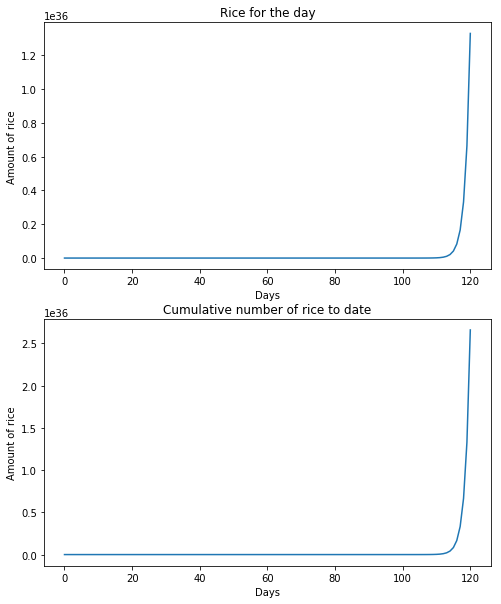

In [107]:
#グラフ作成
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig, (ax3, ax4) = plt.subplots(nrows = 2, figsize = (8,10))


#arrayリストを返す関数作成
def compute_sorori_array(day=100):
    RICE = 1
    n_day_rice = [RICE]  #「その日にもらう米の数」
    ruikei = [RICE] #「その日までに累計で貰う米の数」

    n_day_get_rice = RICE #その日にもらうお米の変数定義
    for i in range(day-1):
        n_day_get_rice *= 2
        n_day_rice.append(n_day_get_rice)
        ruikei.append(ruikei[-1]+n_day_get_rice)

    return n_day_rice, ruikei


#「その日にもらう米の数」の推移グラフ表示
ax3.plot(compute_sorori_array(dt3)[0])
ax3.set_title("Rice for the day")
ax3.set_xlabel('Days')
ax3.set_ylabel('Amount of rice')

#「その日までに累計で貰う米の数」の推移グラフ表示
ax4.plot(compute_sorori_array(dt3)[1])
ax4.set_title("Cumulative number of rice to date")
ax4.set_xlabel('Days')
ax4.set_ylabel('Amount of rice')

fig.show()

## 【問題3】何人が何日生活できる米か

この米があれば何人が何日生活できるか計算する関数を作成してください。コースを受講する期間に貰える米粒で、このクラスにいる人数であれば、何日間生活できるかを出力してみましょう。

関数の最低限の入力は 米粒の数(int) と 人数(int) 、出力は 生活できる日数(int) です。関数名やコメントなどは分かりやすく考えて作成してください。

ここでは1日に必要な米粒の数は提示しません。自分なりに調べて、計算式に落とし込んでください。どう調べ、何を根拠にしたかもコメントを残しておいてください。

### 参考URL
 [１日の炭水化物摂取量](http://www.komenet.jp/sedai02/95.html)→1日に100～150gの炭水化物が必要。ごはんに換算すると、ごはん茶碗約2杯です。
 
 
 [茶碗一杯分のkcal](https://calorie.slism.jp/101088/)→米1合(180cc)は約150gで、炊飯後は330g～350g約2膳分（茶碗に小盛）のご飯になる。
 
[お米一合は何粒](http://saya.txt-nifty.com/booknavi/2007/06/post_839a.html)→約6000粒

In [122]:
#この米があれば何人が何日生活できるか計算する関数を作成
def num_of_people_can_live(rices, people):
    DAILY_REQUIREMENT = 6000
    days = rices / (DAILY_REQUIREMENT * people)
    return int(days)

In [126]:
#このクラスにいる人数＝冨永メンター＋１２人の生徒
print("コースを受講する期間に貰える米粒で{}日間生活できます".format(num_of_people_can_live(compute_sorori_shinzaemon(dt3)[1],13)
                        ))

コースを受講する期間に貰える米粒で34082769122690148756275163299840日間生活できます
